# Marketing Campaign Response EDA

### Inspiration
The main objective is to train a predictive model which allows the company to maximize the profit of the next marketing campaign.

### Context
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. 
The objective is to predict who will respond to an offer for a product or service

### Data info:
- AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response (Target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain - 1 if customer complained in the last 2 years
- DtCustomer - date of customer’s enrolment with the company
- Education - customer’s level of education
- Marital - customer’s marital status
- Kidhome - number of small children in customer’s household
- Teenhome - number of teenagers in customer’s household
- Income - customer’s yearly household income
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalogue
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through company’s web site
- NumWebVisitsMonth - number of visits to company’s web site in the last month
- Recency - number of days since the last purchase

### Response (Target) 
- 1 if customer accepted the offer in the last campaign, 0 otherwise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mk = pd.read_excel(r'D:\From Downloads\marketing_campaign.xlsx')
mk.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
#missing values
mk.isnull().mean()

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

So Income colum has only missing data.

In [9]:
mk.shape

(2240, 29)

- Let's see what is the proportion of customers who has responded/accepted the offer in the previous campaign

In [12]:
(mk['Response']==1).sum()/mk.shape[0]

0.14910714285714285

- So, almost 14.91% responded in the last campaign.
- Now let's check who are those customers:

In [17]:
responded = mk[mk['Response']==1]

In [18]:
#drop the ID colm:
responded.drop('ID', axis=1, inplace=True)

C:\Users\91842\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
responded.head(3)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,7,0,0,0,0,0,0,3,11,1
8,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,...,9,0,0,0,0,0,0,3,11,1
15,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,...,3,0,0,1,1,0,0,3,11,1


In [20]:
#What is the marital status of such customers:
responded['Marital_Status'].value_counts()

Single      106
Married      98
Together     60
Divorced     48
Widow        19
YOLO          1
Absurd        1
Alone         1
Name: Marital_Status, dtype: int64

So it seems most of the responses are from Single and Married people.

In [29]:
#Let's see people who resonoded what is their avg income
responded[responded['Income'].isnull()]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2084,1943,Master,Widow,NaN,0,0,2013-10-30,75,532,126,...,1,0,0,1,0,0,0,3,11,1


In [36]:
responded['Income'].describe()

count       333.000000
mean      60209.675676
std       23194.080987
min        7500.000000
25%       39763.000000
50%       64090.000000
75%       80589.000000
max      105471.000000
Name: Income, dtype: float64

In [31]:
#what is the overall avg income:
mk['Income'].mean()

52247.25135379061

- So it seems people who are responding to the campaign are having avg salary of apporx 60K,
which is more that the overall avg sal of apporx 52K.

In [37]:
#EDU CHECK:
responded['Education'].value_counts()

Graduation    152
PhD           101
Master         57
2n Cycle       22
Basic           2
Name: Education, dtype: int64

So, mostly people with education background of Graduation and PHD are responding more in comparison to other.

In [63]:
((responded['Teenhome']==0) | (responded['Kidhome']==0)).sum()/responded.shape[0]

0.8682634730538922

- So, it seems out of the total responded people almost 87% of them are neither having Kid or Teen at home.

In [73]:
#Let's derive the age of the people who responded:
#we have their DOB Year and we have their enrollment year in the comp
#first convert the enrolmnet year to  date format:
responded['Enroll_Date'] = pd.to_datetime(responded['Dt_Customer'])

C:\Users\91842\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [75]:
responded['Enroll_Year'] = responded['Enroll_Date'].dt.year
responded['Enroll_Year'].head()

C:\Users\91842\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     2012
8     2013
15    2012
33    2012
39    2013
Name: Enroll_Year, dtype: int64

- Now that the convertion is done, 
- let's calculate Age = responded['Enroll_Year'] - responded['Year_Birth']
- This would give us the customers Age.

In [77]:
responded['Age'] = responded['Enroll_Year'] - responded['Year_Birth']
responded['Age'].head()

C:\Users\91842\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0     55
8     39
15    66
33    60
39    70
Name: Age, dtype: int64

In [78]:
#Let's check the Age of such customers:
responded['Age'].describe()

count    334.000000
mean      43.332335
std       12.378916
min       16.000000
25%       34.000000
50%       42.000000
75%       54.000000
max       70.000000
Name: Age, dtype: float64

<AxesSubplot:>

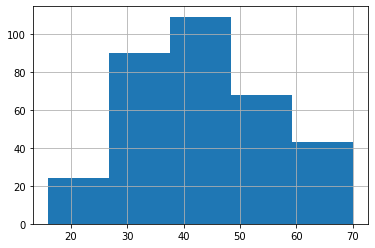

In [83]:
responded['Age'].hist(bins=5)

In [84]:
#Let's discretize the Age colm:
responded['Age_Binned'] = pd.cut(responded['Age'], bins=[15,30,45,60,75], 
                                labels=['Young','Adult','Midaged','Eldely'])
responded['Age_Binned'].value_counts()

C:\Users\91842\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Adult      139
Midaged     98
Young       63
Eldely      34
Name: Age_Binned, dtype: int64

So, almost 90% of the responses are from Age in between 15 to 60.
Also there are few elderly people (Age>60) who responded to the campaign as well.

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


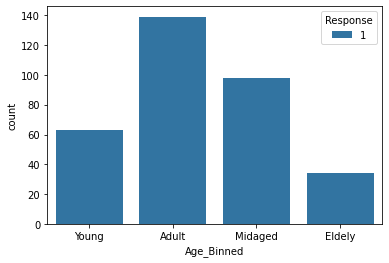

In [86]:
sns.countplot(responded['Age_Binned'], hue=responded['Response']);

- Check normality of 'Age', 'Income' using probability or Q-Q plot:
- Suppose we decide to apply logistic regression on this problem, then we have to check the normality of the data before we scale them, as linear regression and logistic regression both have the assumption of normality.
- If this assumption is violated then we can;t apply those algo on that data.
- Hence. normality check and then based on that we need to take action as required.

In [88]:
import scipy.stats as st
import pylab

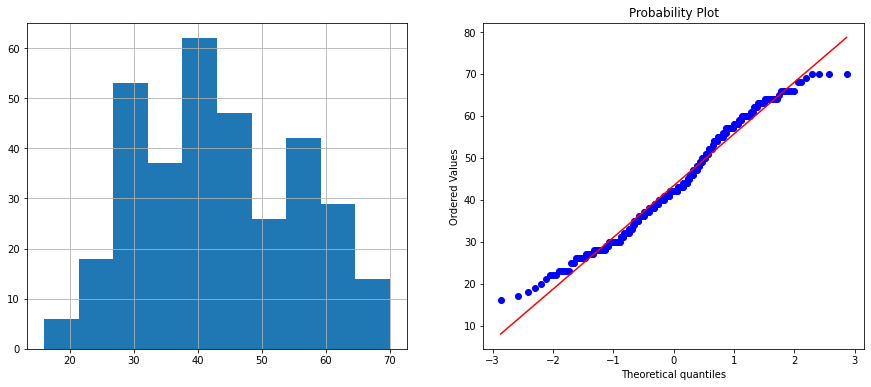

In [89]:
#Normality check for 'Age' data:
def transformation_plot(df, var):
    
    #plot 1st hisogram:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[var].hist()
    
    #sub plot:
    plt.subplot(1,2,2)
    
    #then plot the Q-Q plot or Probability plot:
    st.probplot(df[var], dist='norm', plot=plt)
    plt.show()
    
transformation_plot(responded, 'Age');

Insights:
- So, it seems that 'Age' is almost normaly distributed.
- Hence, no need to apply transformation on 'Age' column.

In [93]:
responded['Income'].fillna(responded['Income'].mean(), inplace=True)
responded['Income'].isnull().sum()

0

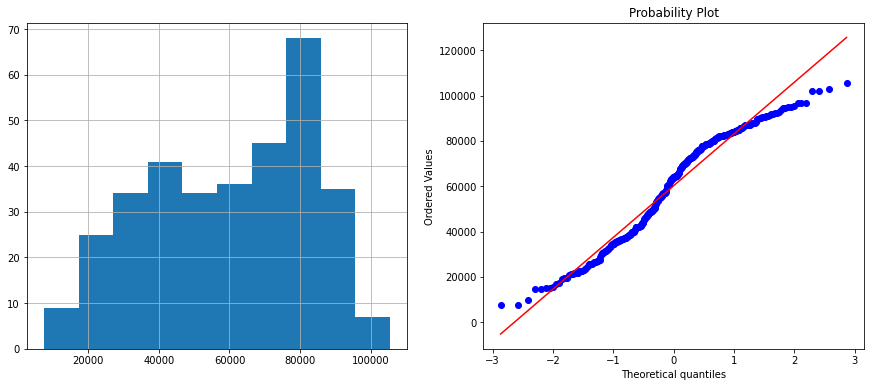

In [94]:
#Normality check for 'Income' data:
def transformation_plot(df, var):
    
    #plot 1st hisogram:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[var].hist()
    
    #sub plot:
    plt.subplot(1,2,2)
    
    #then plot the Q-Q plot or Probability plot:
    st.probplot(df[var], dist='norm', plot=plt)
    plt.show()
    
transformation_plot(responded, 'Income');

Insights:
- Here income looks a little left skewed.
- We need to apply some transformation here to make it norma distribution.

In [95]:
#Firts check with log transformation:
responded['Income_log'] = np.log(responded['Income'])

C:\Users\91842\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


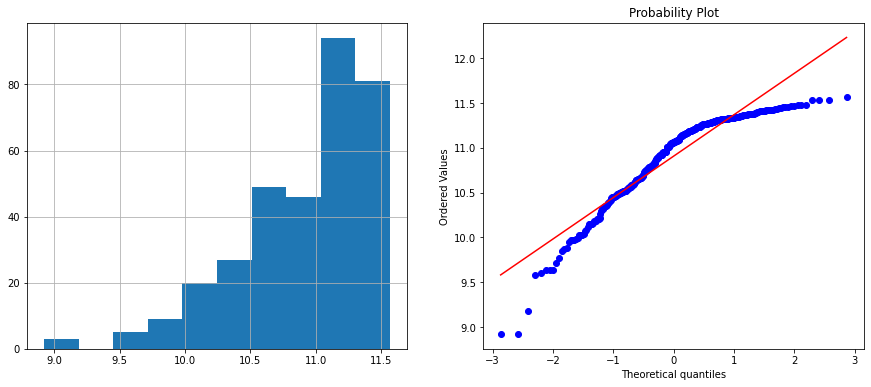

In [96]:
#Normality check for 'Income' data:
def transformation_plot(df, var):
    
    #plot 1st hisogram:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[var].hist()
    
    #sub plot:
    plt.subplot(1,2,2)
    
    #then plot the Q-Q plot or Probability plot:
    st.probplot(df[var], dist='norm', plot=plt)
    plt.show()
    
transformation_plot(responded, 'Income_log');

- It is not working well. Try with boxcox:

C:\Users\91842\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


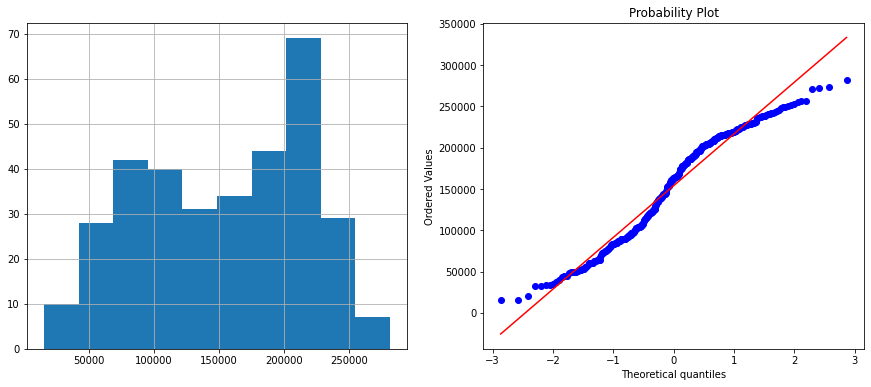

In [97]:
responded['Income_boxcox'], param = st.boxcox(responded['Income'])
transformation_plot(responded, 'Income_boxcox')

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

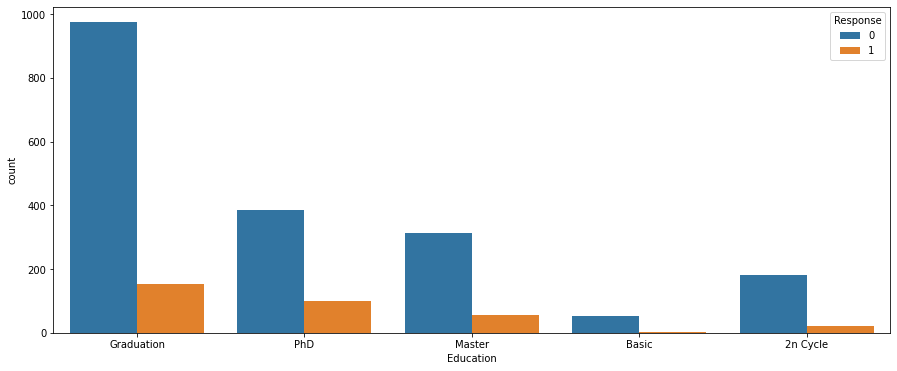

In [10]:
fig = plt.figure()

fig, plt.figure(figsize=(15,6))

sns.countplot(mk['Education'], hue=mk['Response']);

- People with different education background has responded to the last campaign

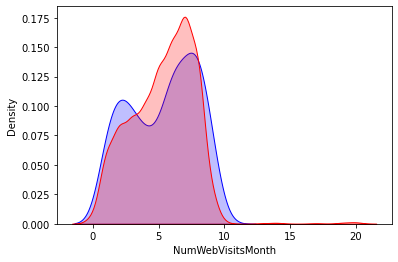

In [15]:
ax = sns.kdeplot(mk.loc[mk['Response']==1, 'NumWebVisitsMonth'],
           color='b',
           shade=True,
           label='Responded')


ax = sns.kdeplot(mk.loc[mk['Response']==0, 'NumWebVisitsMonth'],
           color='r',
           shade=True,
           label='Not Response');

- There is overlap in the data of customers with respect to their number of the website visits each month

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

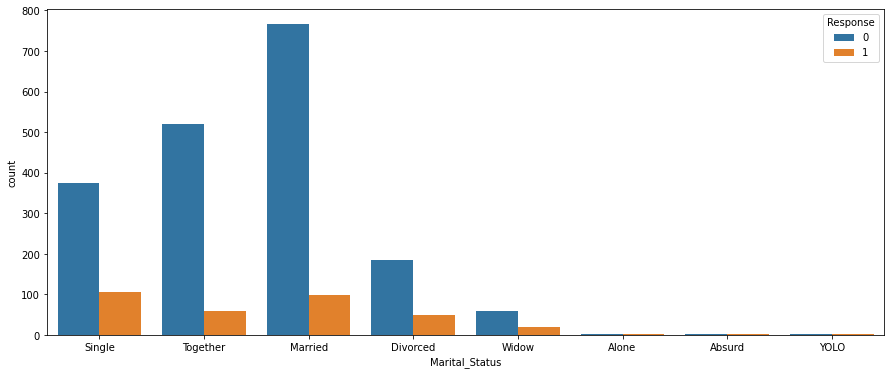

In [16]:
fig = plt.figure()

fig, plt.figure(figsize=(15,6))

sns.countplot(mk['Marital_Status'], hue=mk['Response']);

- Single people have responded the most to the this campaign. So, customers with single marital status can be potential customers.